<div align="center"> 
    <h3><font color='blue'>CSE 574 Sections C&D: Introduction to Machine Learning, Spring 2022 </font></h3>
    <h1> Assignment 3 </h1>
    <h2> Part 3 : Building a CNN </h2>
    <h4> Submitted By : Akanksha Das & Rahat Bhalla </h4>

<p>"I (We) certify that the code and data in this assignment were generated independently,using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."</p>
</div>

In [1]:
#Importing Necessary Libraries for Implementing Part 1
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plotter
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.datasets import fashion_mnist 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


<b>Creating a Ney Numpy Array from Y_train for Labeled Vectors<b>

In [2]:
labeled_Y = np.where(y_train==0,'T-Shirt/Top',y_train)
labeled_Y = np.where(y_train==1,'Trouser',labeled_Y)
labeled_Y = np.where(y_train==2,'Pullover',labeled_Y)
labeled_Y = np.where(y_train==3,'Dress',labeled_Y)
labeled_Y = np.where(y_train==4,'Coat',labeled_Y)
labeled_Y = np.where(y_train==5,'Sandal',labeled_Y)
labeled_Y = np.where(y_train==6,'Shirt',labeled_Y)
labeled_Y = np.where(y_train==7,'Sneaker',labeled_Y)
labeled_Y = np.where(y_train==8,'Bag',labeled_Y)
labeled_Y = np.where(y_train==9,'Ankle Boot',labeled_Y)


print(labeled_Y)

['Ankle Boot' 'T-Shirt/Top' 'T-Shirt/Top' ... 'Dress' 'T-Shirt/Top'
 'Sandal']


<b>Finding the mean of all Pixels within the image<b>

In [3]:
meanOfImage = []
for counter in range(x_train.shape[0]):
    var=x_train[counter].mean()
    meanOfImage.append(var)

print(len(meanOfImage))

60000


In [4]:
meanOfImage[5]

107.35331632653062

<b>Visualization of the difference that exists between calculated Mean of the pixels of images in a Class<b>

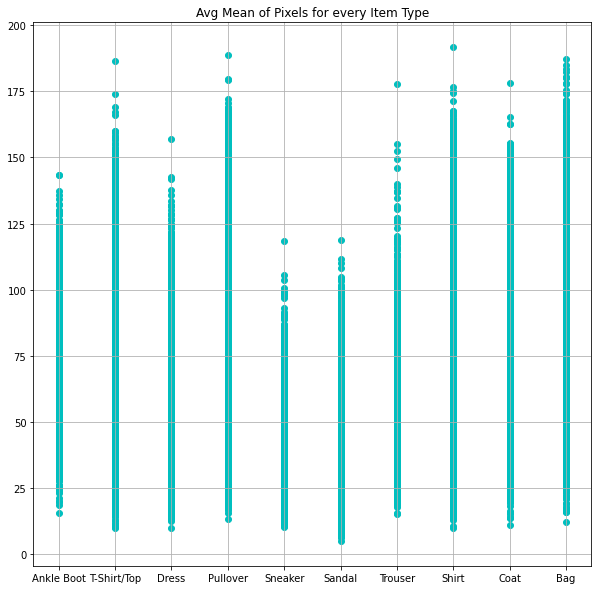

In [5]:
avgMeanOfEveryImage = np.array(meanOfImage)
avgMeanOfEveryImage.shape

plotter.figure(figsize=(10,10))
plotter.scatter(labeled_Y,avgMeanOfEveryImage,color='c')
plotter.title('Avg Mean of Pixels for every Item Type')
plotter.grid()
plotter.show()

In [6]:
print(avgMeanOfEveryImage)

[ 97.25382653 107.90561224  36.55867347 ...  79.77806122  42.74234694
  21.28061224]


<b>Visualization of the Variance of Pixels in Every Image of every Class<b>

In [7]:
varOfImage = []
for counter in range(x_train.shape[0]):
    var=x_train[counter].var()
    varOfImage.append(var)

print(len(varOfImage))

60000


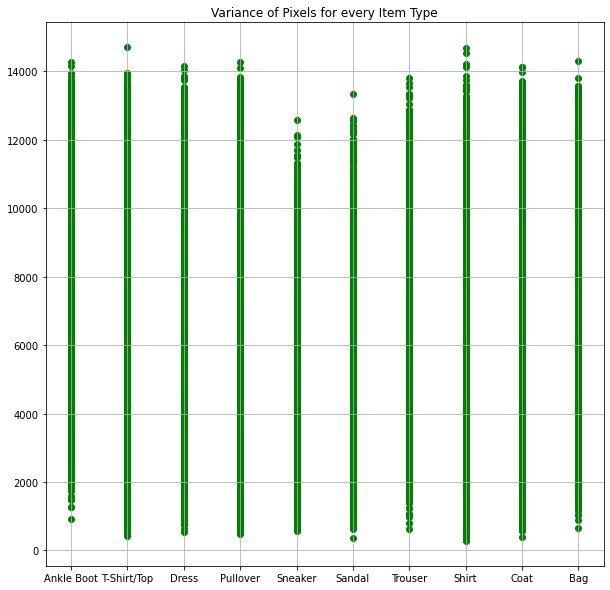

In [8]:
varOfEveryImage = np.array(varOfImage)
varOfEveryImage.shape

plotter.figure(figsize=(10,10))
plotter.scatter(labeled_Y,varOfEveryImage,color='g')
plotter.title('Variance of Pixels for every Item Type')
plotter.grid()
plotter.show()

In [9]:
print(varOfEveryImage)

[10361.68174556 10166.98088687  2469.96594518 ... 11558.5782942
  1482.91575776  2355.79880779]


<b>Count of Images by Label given in Training set<b>

In [10]:
labels, counts = np.unique(labeled_Y, return_counts=True)

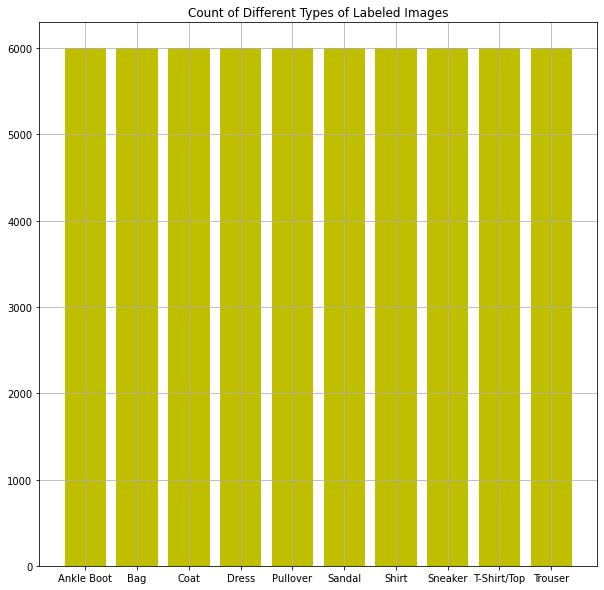

In [11]:
plotter.figure(figsize=(10,10))
plotter.bar(labels,counts,color='y')
plotter.title('Count of Different Types of Labeled Images')
plotter.grid()
plotter.show()

<b>Analyzing Attributes of Given Data:<b>

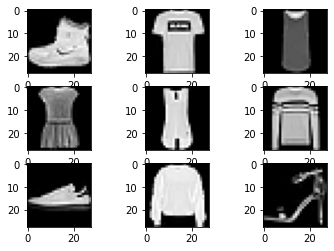

In [12]:
# plot first few images
for i in range(9):
	# define subplot
	plotter.subplot(330 + 1 + i)
	# plot raw pixel data
	plotter.imshow(x_train[i], cmap=plotter.get_cmap('gray'))
# show the figure
plotter.show()

In [13]:
print(f'Shape of X_train {x_train.shape}')
print(f'Shape of Y_train {y_train.shape}')
print(f'Shape of X_test {x_test.shape}')
print(f'Shape of Y_test {y_test.shape}')

Shape of X_train (60000, 28, 28)
Shape of Y_train (60000,)
Shape of X_test (10000, 28, 28)
Shape of Y_test (10000,)


In [14]:
print(f'Datatype of X_train {x_train.dtype}')
print(f'Datatype of Y_train {y_train.dtype}')
print(f'Datatype of X_test {x_test.dtype}')
print(f'Datatype of Y_test {y_test.dtype}')

Datatype of X_train uint8
Datatype of Y_train uint8
Datatype of X_test uint8
Datatype of Y_test uint8


<b>Converting to Category:<b>

In [15]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)


In [16]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
print(f'Datatype of X_train {x_train.dtype}')
print(f'Datatype of X_test {x_test.dtype}')

Datatype of X_train float32
Datatype of X_test float32


In [17]:
print(f'Datatype of Y_train {y_train.dtype}')
print(f'Datatype of Y_test {y_test.dtype}')

Datatype of Y_train float32
Datatype of Y_test float32


<b>Normalizing x values<b>

In [18]:
x_train = x_train/255.0
x_test = x_test/255.0

<b>Plotting a Single image from the Data Set<b>

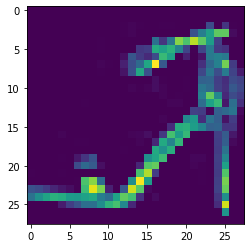

In [19]:
image=x_train[8,:].reshape((28,28))
plotter.imshow(image)
plotter.show()

<b>Re-shaping the Data for Processing<b>

In [20]:
no_of_pixel_rows=28
no_of_pixel_columns=28
net_shape=(no_of_pixel_rows,no_of_pixel_columns,1)
x_train=x_train.reshape(x_train.shape[0], *net_shape)
x_test=x_test.reshape(x_test.shape[0], *net_shape)

print(f"Shape of Training X after reshaping {x_train.shape}")
print(f"Shape of Test X after reshaping {x_test.shape}")

Shape of Training X after reshaping (60000, 28, 28, 1)
Shape of Test X after reshaping (10000, 28, 28, 1)


In [21]:
print(f"Shape of Labeled Y Training Data is : {y_train.shape}")

Shape of Labeled Y Training Data is : (60000, 10)


<b>Implementing CNN Model<b>

In [22]:
ConvolutionalNeuralNetworkModel = keras.Sequential([
                                  Conv2D(filters=32, kernel_size =2, padding='same', activation = 'relu', input_shape=net_shape),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Conv2D(filters=64, kernel_size =2, padding='same', activation = 'relu'),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Flatten(),
                                  Dense(80, activation='relu'),
                                  
                                  Dense(10,activation='softmax')])
   

ConvolutionalNeuralNetworkModel.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                          metrics=['accuracy'])
trainingResults = ConvolutionalNeuralNetworkModel.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=50)


Epoch 1/50
469/469 [==============================] - 13s 7ms/step - loss: 0.5733 - accuracy: 0.7890 - val_loss: 0.4178 - val_accuracy: 0.8530
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3905 - accuracy: 0.8595 - val_loss: 0.3510 - val_accuracy: 0.8747
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3484 - accuracy: 0.8740 - val_loss: 0.3269 - val_accuracy: 0.8823
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3163 - accuracy: 0.8845 - val_loss: 0.3085 - val_accuracy: 0.8890
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2946 - accuracy: 0.8927 - val_loss: 0.2975 - val_accuracy: 0.8909
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2823 - accuracy: 0.8965 - val_loss: 0.2871 - val_accuracy: 0.8931
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2672 - accuracy: 0.9029 - val_loss: 0.2767 - val_accuracy: 0.8990
Epoch

In [23]:
trainingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_train,y_train,verbose=0)
testingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_test,y_test,verbose=0)
print('\n\n')
print('\nTraining Accuracy: ',trainingAccuracy[1])
print('\nTest Accuracy: ',testingAccuracy[1])





Training Accuracy:  0.9883333444595337

Test Accuracy:  0.9269999861717224


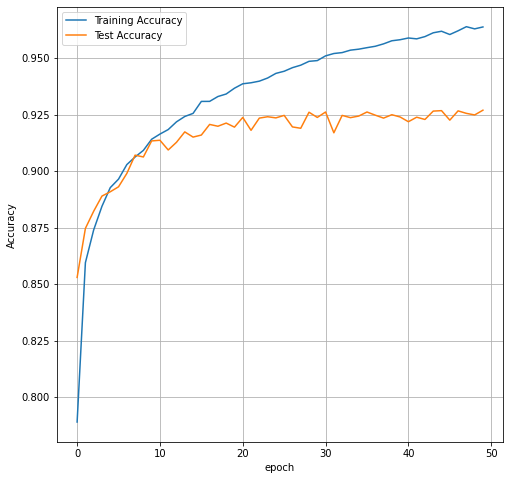

In [24]:
plotter.figure(figsize=(8,8))
plotter.plot(trainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(trainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

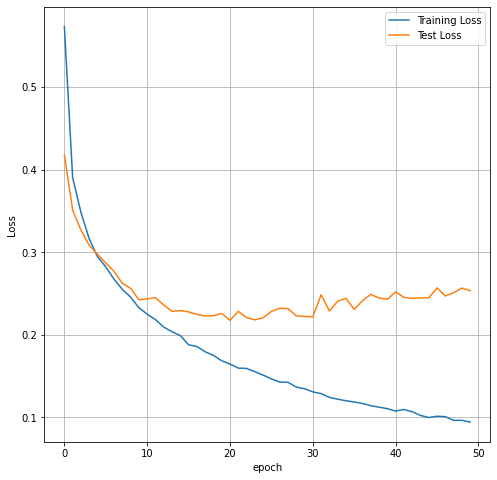

In [25]:
plotter.figure(figsize=(8,8))
plotter.plot(trainingResults.history['loss'], label='Training Loss')
plotter.plot(trainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()

<div>
    <h3 align="center"> Chosen Base Model Description</h3>
<p>The Base Model that has been finalized has 1 Input Layer with 14 Units, 3 Hidden Layers: the first with 30 units ,  the second with 15 units and the third with 7 Units, and one output layer with 1 unit. </p>
</div>

<b>Implementing Early stopping<b>

In [26]:
ConvolutionalNeuralNetworkModel = keras.Sequential([
                                  Conv2D(filters=32, kernel_size =2, activation = 'relu', input_shape=net_shape),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Conv2D(filters=64, kernel_size =2, activation = 'relu'),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Flatten(),
                                  Dense(80, activation='relu'),
                                  
                                  Dense(10,activation='softmax')])

#EarlyStopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
early_stopping = EarlyStopping()
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    min_delta=0.001, 
    mode='max'
)

ConvolutionalNeuralNetworkModel.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                          metrics=['accuracy'])
earlyStoppingTrainingResults = ConvolutionalNeuralNetworkModel.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=50,callbacks=[custom_early_stopping])



Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5893 - accuracy: 0.7863 - val_loss: 0.4252 - val_accuracy: 0.8450
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3975 - accuracy: 0.8565 - val_loss: 0.3624 - val_accuracy: 0.8701
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3545 - accuracy: 0.8719 - val_loss: 0.3433 - val_accuracy: 0.8741
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3254 - accuracy: 0.8813 - val_loss: 0.3099 - val_accuracy: 0.8893
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3036 - accuracy: 0.8898 - val_loss: 0.3015 - val_accuracy: 0.8890
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2891 - accuracy: 0.8949 - val_loss: 0.2848 - val_accuracy: 0.8952
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2751 - accuracy: 0.8999 - val_loss: 0.2755 - val_accuracy: 0.8985
Epoch 

In [27]:
earlyStoppingTrainingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_train,y_train,verbose=0)
earlyStoppingTestingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_test,y_test,verbose=0)
print('\n\n')
print('\nTraining Accuracy Early Stopping: ',earlyStoppingTrainingAccuracy[1])
print('\nTest Accuracy Early Stopping: ',earlyStoppingTestingAccuracy[1])





Training Accuracy Early Stopping:  0.9707499742507935

Test Accuracy Early Stopping:  0.9259999990463257


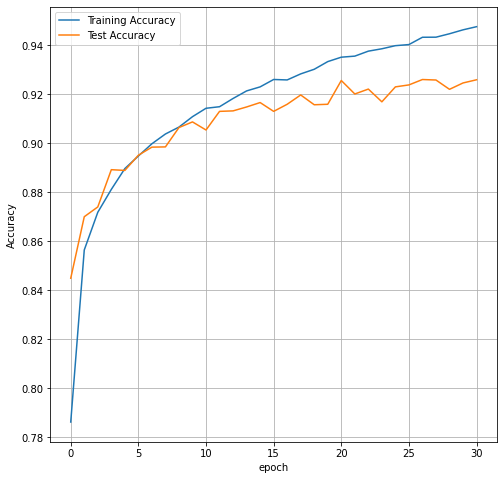

In [28]:
plotter.figure(figsize=(8,8))
plotter.plot(earlyStoppingTrainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(earlyStoppingTrainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

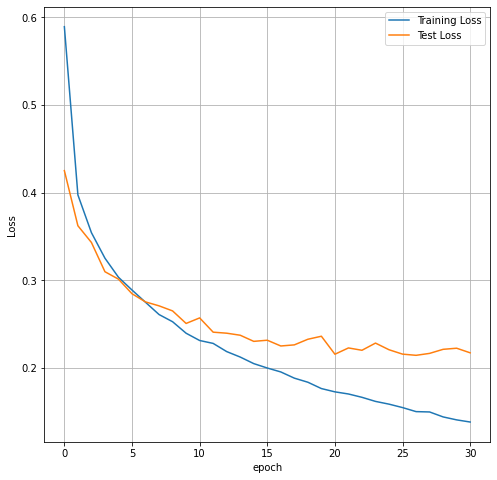

In [29]:
plotter.figure(figsize=(8,8))
plotter.plot(earlyStoppingTrainingResults.history['loss'], label='Training Loss')
plotter.plot(earlyStoppingTrainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()

<b>Using SGD with the momentum variable<b>

In [30]:
ConvolutionalNeuralNetworkModel = keras.Sequential([
                                  Conv2D(filters=32, kernel_size =2, activation = 'relu', input_shape=net_shape),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Conv2D(filters=64, kernel_size =2, activation = 'relu'),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Flatten(),
                                  Dense(80, activation='relu'),
                                  
                                  Dense(10,activation='softmax')])

learning_rate = 0.001
epochs = 50
decay_rate = learning_rate / epochs
momentum = 0.99
sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

ConvolutionalNeuralNetworkModel.compile(optimizer=sgd,
                           loss='categorical_crossentropy',
                          metrics=['accuracy'])
sgdMomentumTrainingResults = ConvolutionalNeuralNetworkModel.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=epochs)



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 1.1047 - accuracy: 0.6007 - val_loss: 0.6465 - val_accuracy: 0.7649
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.5681 - accuracy: 0.7893 - val_loss: 0.5208 - val_accuracy: 0.8078
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.4663 - accuracy: 0.8284 - val_loss: 0.4457 - val_accuracy: 0.8380
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.4220 - accuracy: 0.8445 - val_loss: 0.4085 - val_accuracy: 0.8506
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3936 - accuracy: 0.8557 - val_loss: 0.3730 - val_accuracy: 0.8658
Epoch 6/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3773 - accuracy: 0.8616 - val_loss: 0.3669 - val_accuracy: 0.8667
Epoch 7/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3570 - accuracy: 0.8690 - val_loss: 0.3525 - val_accuracy: 0.8698
Epoch 

In [31]:
sgdMomentumTrainingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_train,y_train,verbose=0)
sgdMomentumTestingAccuracy = ConvolutionalNeuralNetworkModel.evaluate(x_test,y_test,verbose=0)
print('\n\n')
print('\nTraining Accuracy SGDMomentum: ',sgdMomentumTrainingAccuracy[1])
print('\nTest Accuracy SGDMomentum: ',sgdMomentumTestingAccuracy[1])





Training Accuracy SGDMomentum:  0.9498999714851379

Test Accuracy SGDMomentum:  0.9182000160217285


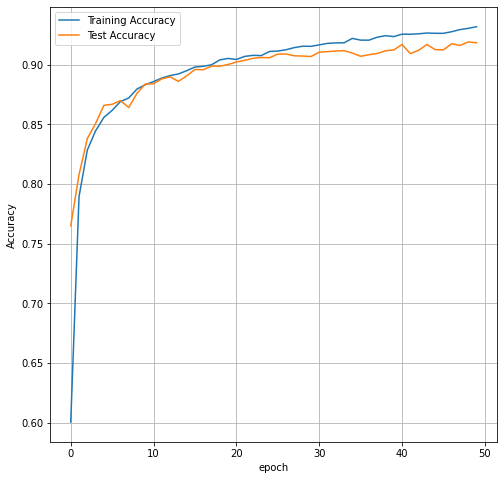

In [32]:
plotter.figure(figsize=(8,8))
plotter.plot(sgdMomentumTrainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(sgdMomentumTrainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

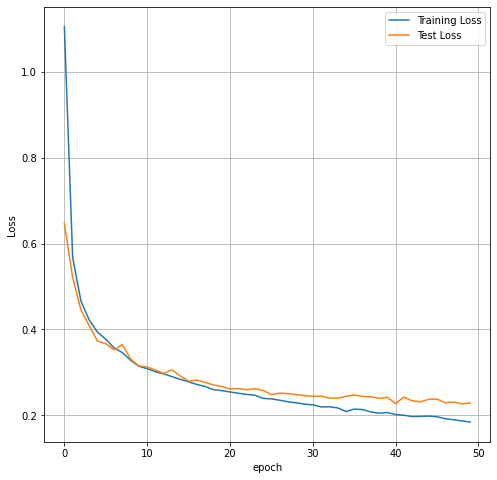

In [33]:
plotter.figure(figsize=(8,8))
plotter.plot(sgdMomentumTrainingResults.history['loss'], label='Training Loss')
plotter.plot(sgdMomentumTrainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()

<b>Implementing K FOLD to Verify Accuracy Scores on Training Data Set<b>

In [34]:
def create_network():
    ConvolutionalNeuralNetworkModel = keras.Sequential([
                                  Conv2D(filters=32, kernel_size =2, activation = 'relu', input_shape=net_shape),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Conv2D(filters=64, kernel_size =2, activation = 'relu'),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Flatten(),
                                  Dense(80, activation='relu'),                                  
                                  Dense(10,activation='softmax')])
    ConvolutionalNeuralNetworkModel.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                          metrics=['accuracy'])
    return ConvolutionalNeuralNetworkModel

print('Running K-Fold Neural Network')
neural_network =  keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_network, 
                                 epochs=50, 
                                 batch_size=128, 
                                 verbose=0)
crossValidationScores= cross_val_score(neural_network, x_train,y_train, cv=3)

print('\n\nCross Validation Scores obtained via K FOLD:',crossValidationScores)
    


Running K-Fold Neural Network


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.




Cross Validation Scores obtained via K FOLD: [0.92105001 0.92105001 0.91955   ]


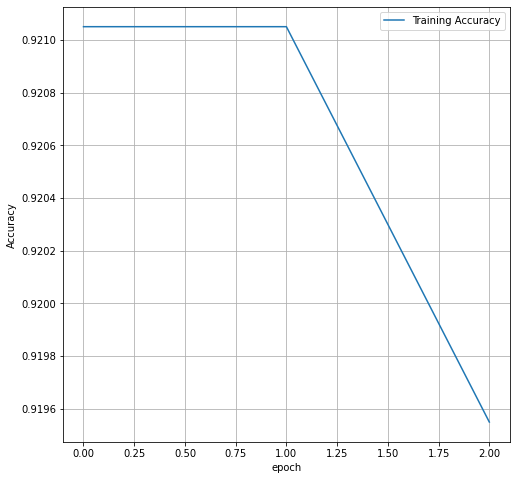

In [35]:
plotter.figure(figsize=(8,8))
plotter.plot(crossValidationScores, label='Training Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

<b>Implementing L2 Regularization on Training Data Set<b>

In [36]:
l2RegualizerNeuralNetworkModel =  keras.Sequential([
                                  Conv2D(filters=32, kernel_size =2, activation = 'relu', input_shape=net_shape),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Conv2D(filters=64, kernel_size =2, activation = 'relu'),
                                  MaxPooling2D(pool_size=2),
                                  Dropout(0.25),
                                  Flatten(),
                                  Dense(80, activation='relu'),
                                  
                                  Dense(10,activation='softmax')])

l2RegualizerNeuralNetworkModel.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                          metrics=['accuracy'])

    
l2RegularizertrainingResults = l2RegualizerNeuralNetworkModel.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=50)


Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6065 - accuracy: 0.7774 - val_loss: 0.4375 - val_accuracy: 0.8472
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4004 - accuracy: 0.8571 - val_loss: 0.3584 - val_accuracy: 0.8747
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3586 - accuracy: 0.8706 - val_loss: 0.3416 - val_accuracy: 0.8763
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.3338 - accuracy: 0.8783 - val_loss: 0.3223 - val_accuracy: 0.8821
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3107 - accuracy: 0.8857 - val_loss: 0.3099 - val_accuracy: 0.8863
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2935 - accuracy: 0.8928 - val_loss: 0.3080 - val_accuracy: 0.8859
Epoch 7/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2794 - accuracy: 0.8968 - val_loss: 0.2770 - val_accuracy: 0.8979
Epoch 

In [37]:
l2RegularizerTrainingAccuracy = l2RegualizerNeuralNetworkModel.evaluate(x_train,y_train,verbose=0)
l2RegularizerTestingAccuracy = l2RegualizerNeuralNetworkModel.evaluate(x_test,y_test,verbose=0)
print('\n\n')
print('\nTraining Accuracy L2Regularizer: ',l2RegularizerTrainingAccuracy[1])
print('\nTest Accuracy L2Regularizer: ',l2RegularizerTestingAccuracy[1])





Training Accuracy L2Regularizer:  0.9836999773979187

Test Accuracy L2Regularizer:  0.9215999841690063


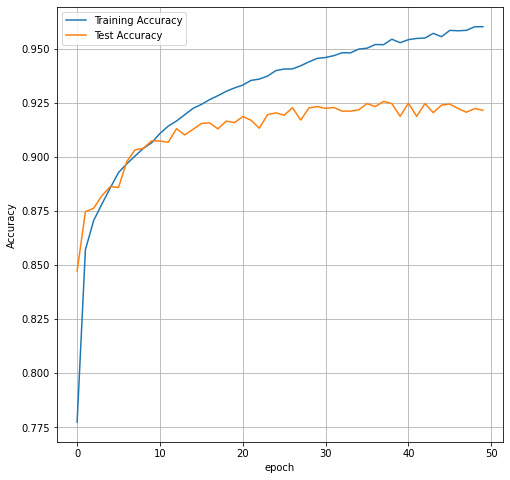

In [38]:
plotter.figure(figsize=(8,8))
plotter.plot(l2RegularizertrainingResults.history['accuracy'], label='Training Accuracy')
plotter.plot(l2RegularizertrainingResults.history['val_accuracy'], label='Test Accuracy')
plotter.xlabel('epoch')
plotter.ylabel('Accuracy')
plotter.legend()
plotter.grid()
plotter.show()

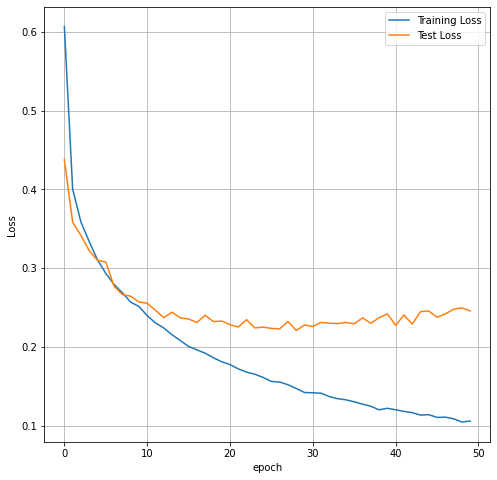

In [39]:
plotter.figure(figsize=(8,8))
plotter.plot(l2RegularizertrainingResults.history['loss'], label='Training Loss')
plotter.plot(l2RegularizertrainingResults.history['val_loss'], label='Test Loss')
plotter.xlabel('epoch')
plotter.ylabel('Loss')
plotter.legend()
plotter.grid()
plotter.show()